In [1]:
import sklearn
import pandas as pd
# 数据预处理：
# step1：查看数据，分析数据
# step2: 检查数据
# step3: 把数据样本里的 ？ 填充为该特征的众数
# step4：数据转换，把字符串转换为 int
# 训练、测试：
# step5：运用 sklearn 训练单个 model
# step6：测试单个模型的准确度
# step7：挑出比较好的模型进行融合
# step8: 测试准确度
# step9: 可视化每个特征对最终结果的影响程度
# ste10: 只使用影响程度最大的几个特征，再次训练，测试

#尝试提升准确度的过程：
# step1: 挑出准确度较高的几个模型，进行融合
#调参：
# step2：微调单个模型的参数 (dt,knn,log = 9,7,1)
# step3：调节融合模型的权重比例 (dt:knn:log = 23：3：0, 准确率： 0.8602051471039862)
#一开始：log、knn、dt的准确度分别是：0.785,0.779,0.842,通过微调参数分别得到：0.8006,0.802,0.8573 的准确度
# 从单个模型的预测准确度来看，dt 的效果明显好于 log 和 knn，所以在模型融合时给 dt 分配较高的权重
# step4：可视化出每个特征对最终结果的影响程度，挑出决定作用最大的几个特征
# step5：微调单个模型的参数 (dt,knn,log = 9,13,1)
# 此时微调后的：log、knn、dt 的准确度分别是：0.803，0.8378，0.8497，log 有略微提升、knn 提升显著、dt 有一定下降
# step6：调节融合模型的权重比例 （dt:knn:log = 7: 5：1，准确率：0.858731036177139）

In [723]:
#添加列名
train_data = pd.read_csv("./algo_question/adult.data",names=['age','workclass','fnlwgt','education','education-num',
                                'marital-status','occupation','relationship','race','sex',
                                'capital-gain','capital-loss',
                                'hours-per-week','native-country','classification'])

In [3]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#分析数据

In [742]:
train_data['workclass'].value_counts() # 计算该特征每个类别的 counts

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
train_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
train_data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [9]:
#计算每一个标签每个类别的 counts
names=['age','workclass','fnlwgt','education','education-num',
                                'marital-status','occupation','relationship','race','sex',
                                'capital-gain','capital-loss',
                                'hours-per-week','native-country','classification']
for i in names:
    print(train_data[i].value_counts())

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190     13
203488     13
123011     13
113364     12
121124     12
126675     

In [10]:
#可视化都有那些类别
print(train_data["workclass"].unique())
print(train_data["occupation"].unique())
print(train_data["native-country"].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [11]:
# 数据填充：把 ？ 以该特征的众数填充
train_data.loc[train_data["workclass"] == ' ?',"workclass"] = ' Private'
train_data.loc[train_data["occupation"] == ' ?',"occupation"] = ' Prof-specialty'
train_data.loc[train_data["native-country"] == ' ?',"native-country"] = ' United-States'

In [12]:
#验证 ？ 是否已被全填充
print(train_data["workclass"].unique())
print(train_data["occupation"].unique())
print(train_data["native-country"].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [13]:
# 数据转换： 把字符串转换为 int 
Workclass = [' Private',' Self-emp-not-inc',' Self-emp-inc',' Federal-gov',' Local-gov',' State-gov',
            ' Without-pay', ' Never-worked']
j = 0
for i in Workclass:
    print(i)
    train_data.loc[train_data["workclass"] == i, "workclass"] = j
    j += 1
print(train_data["workclass"].unique())

 Private
 Self-emp-not-inc
 Self-emp-inc
 Federal-gov
 Local-gov
 State-gov
 Without-pay
 Never-worked
[5 1 0 3 4 2 6 7]


In [14]:
print(train_data["education"].unique())
Education = [' Bachelors',' Some-college',' 11th',' HS-grad',' Prof-school',' Assoc-acdm',' Assoc-voc',
             ' 9th',' 7th-8th',' 12th',' Masters',' 1st-4th',' 10th',' Doctorate',' 5th-6th',' Preschool']
j = 0
for i in Education:
    train_data.loc[train_data["education"] == i, "education"] = j
    j += 1
print(train_data["education"].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

[ 0  3  2 10  7  1  5  6  8 13  4 14 12 11 15  9]


In [15]:
print(train_data["marital-status"].unique())
Marital = [' Married-civ-spouse',' Divorced',' Never-married',' Separated',
            ' Widowed',' Married-spouse-absent',' Married-AF-spouse']
j = 0
for i in Marital:
    train_data.loc[train_data["marital-status"] == i, "marital-status"] = j
    j += 1
print(train_data["marital-status"].unique())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[2 0 1 5 3 6 4]


In [16]:
print(train_data["occupation"].unique())
Occupation = [' Tech-support',' Craft-repair',' Other-service',' Sales',' Exec-managerial', 
             ' Prof-specialty',' Handlers-cleaners',' Machine-op-inspct', 
             ' Adm-clerical',' Farming-fishing', 
             ' Transport-moving',' Priv-house-serv',' Protective-serv',' Armed-Forces']
j = 0
for i in Occupation:
    train_data.loc[train_data["occupation"] == i, "occupation"] = j
    j += 1
print(train_data["occupation"].unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[ 8  4  6  5  2  3  1 10  9  7  0 12 13 11]


In [17]:
print(train_data["relationship"].unique())
Relationship = [' Wife',' Own-child',' Husband',' Not-in-family',' Other-relative',' Unmarried']
j = 0
for i in Relationship:
    train_data.loc[train_data["relationship"] == i, "relationship"] = j
    j += 1
print(train_data["relationship"].unique())

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[3 2 0 1 5 4]


In [18]:
print(train_data["race"].unique())
Race = [' White',' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other',' Black']
j = 0
for i in Race:
    train_data.loc[train_data["race"] == i, "race"] = j
    j += 1
print(train_data["race"].unique())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[0 4 1 2 3]


In [19]:
print(train_data["sex"].unique())
Sex = [' Female',' Male']
j = 0
for i in Sex:
    train_data.loc[train_data["sex"] == i, "sex"] = j
    j += 1
print(train_data["sex"].unique())

[' Male' ' Female']
[1 0]


In [20]:
print(train_data["native-country"].unique())
Native = [' United-States',' Cambodia',' England',' Puerto-Rico',' Canada',' Germany', 
          ' Outlying-US(Guam-USVI-etc)',' India',' Japan',' Greece',' South',
          ' China',' Cuba', ' Iran', ' Honduras', ' Philippines', ' Italy', ' Poland',
          ' Jamaica', ' Vietnam', ' Mexico', ' Portugal', ' Ireland', ' France', 
          ' Dominican-Republic', ' Laos', ' Ecuador', ' Taiwan', ' Haiti', 
          ' Columbia', ' Hungary', ' Guatemala', ' Nicaragua', ' Scotland', 
          ' Thailand', ' Yugoslavia', ' El-Salvador', ' Trinadad&Tobago', ' Peru', 
          ' Hong', ' Holand-Netherlands']
j = 0
for i in Native:
    train_data.loc[train_data["native-country"] == i, "native-country"] = j
    j += 1
print(train_data["native-country"].unique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
[ 0 12 18  7 20 10  3 14  2  4  5 13 15 16 17 29  1 34 26 25 27 28 21 24
 36 23 31 11  8 35 38  6 33 37  9 32 19 39 22 30 40]


In [21]:
print(train_data["classification"].unique())
Classification = [" >50K", " <=50K"]
j = 0
for i in Classification:
    train_data.loc[train_data["classification"] == i, "classification"] = j
    j += 1
print(train_data["classification"].unique())

[' <=50K' ' >50K']
[1 0]


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

/home/mzl/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
predictors =['age','workclass','fnlwgt','education','education-num',
                                'marital-status','occupation','relationship','race','sex',
                                'capital-gain','capital-loss',
                                'hours-per-week','native-country']

alg = LinearRegression()

kf = KFold(train_data.shape[0], n_folds = 3, random_state = 1)

predictions = []
#交叉验证
for train, test in kf:
    train_predictors = (train_data[predictors].iloc[train,:])
    train_target = train_data["classification"].iloc[train]
    alg.fit(train_predictors, train_target)
    
    test_predictions = alg.predict(train_data[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [24]:
import numpy as np

In [25]:
prdictions = np.concatenate(predictions, axis = 0)
prdictions[prdictions > .1] = 1
prdictions[prdictions <= .1] = 0
accuracy = sum(prdictions[prdictions == train_data["classification"]]) / len(prdictions)
print(accuracy)

0.7589754614416019


In [26]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

In [614]:
alg = LogisticRegression(random_state = 1)
#交叉验证
scores = cross_validation.cross_val_score(alg, train_data[predictors], train_data["classification"], cv = 5)
print(scores.mean())

0.7978256207298123


In [28]:
alg.fit(train_data[predictors], train_data["classification"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
test_data = pd.read_csv("./algo_question/adult.test",names=['age','workclass','fnlwgt','education','education-num',
                                'marital-status','occupation','relationship','race','sex',
                                'capital-gain','capital-loss',
                                'hours-per-week','native-country','classification'])

In [30]:
test_data['workclass'].value_counts() #计算每个标签的 counts

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

In [31]:
test_data['occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64

In [32]:
train_data['native-country'].value_counts()

0     29753
20      643
15      198
5       137
4       121
3       114
36      106
7       100
12       95
2        90
18       81
10       80
11       75
16       73
24       70
19       67
31       64
8        62
17       60
29       59
27       51
28       44
13       43
21       37
32       34
38       31
9        29
23       29
26       28
22       24
39       20
37       19
1        19
25       18
34       18
35       16
6        14
14       13
30       13
33       12
40        1
Name: native-country, dtype: int64

In [33]:
#可视化所有类别
print(test_data["workclass"].unique())
print(test_data["occupation"].unique())
print(test_data["native-country"].unique())

[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
[' United-States' ' ?' ' Peru' ' Guatemala' ' Mexico'
 ' Dominican-Republic' ' Ireland' ' Germany' ' Philippines' ' Thailand'
 ' Haiti' ' El-Salvador' ' Puerto-Rico' ' Vietnam' ' South' ' Columbia'
 ' Japan' ' India' ' Cambodia' ' Poland' ' Laos' ' England' ' Cuba'
 ' Taiwan' ' Italy' ' Canada' ' Portugal' ' China' ' Nicaragua'
 ' Honduras' ' Iran' ' Scotland' ' Jamaica' ' Ecuador' ' Yugoslavia'
 ' Hungary' ' Hong' ' Greece' ' Trinadad&Tobago'
 ' Outlying-US(Guam-USVI-etc)' ' France']


In [34]:
#数据填充：把 ？以众数填充
test_data.loc[test_data["workclass"] == ' ?',"workclass"] = ' Private' 
test_data.loc[test_data["occupation"] == ' ?',"occupation"] = ' Prof-specialty'
test_data.loc[test_data["native-country"] == ' ?',"native-country"] = ' United-States'

In [35]:
#数据转换：把字符串型转换为 int 
print(test_data["workclass"].unique())
Workclass = [' Private',' Self-emp-not-inc',' Self-emp-inc',' Federal-gov',' Local-gov',' State-gov',
            ' Without-pay', ' Never-worked']
j = 0
for i in Workclass:
    test_data.loc[test_data["workclass"] == i, "workclass"] = j
    j += 1
print(test_data["workclass"].unique())

[' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
[0 4 1 3 5 2 6 7]


In [36]:
print(test_data["education"].unique())
Education = [' Bachelors',' Some-college',' 11th',' HS-grad',' Prof-school',' Assoc-acdm',' Assoc-voc',
             ' 9th',' 7th-8th',' 12th',' Masters',' 1st-4th',' 10th',' Doctorate',' 5th-6th',' Preschool']
j = 0
for i in Education:
    test_data.loc[test_data["education"] == i, "education"] = j
    j += 1
print(test_data["education"].unique())

[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
[ 2  3  5  1 12  4  8  0 10 13 14  6  7  9 11 15]


In [37]:
print(test_data["marital-status"].unique())
Marital = [' Married-civ-spouse',' Divorced',' Never-married',' Separated',
            ' Widowed',' Married-spouse-absent',' Married-AF-spouse']
j = 0
for i in Marital:
    test_data.loc[test_data["marital-status"] == i, "marital-status"] = j
    j += 1
print(test_data["marital-status"].unique())

[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
[2 0 4 1 3 5 6]


In [38]:
print(test_data["occupation"].unique())
Occupation = [' Tech-support',' Craft-repair',' Other-service',' Sales',' Exec-managerial', 
             ' Prof-specialty',' Handlers-cleaners',' Machine-op-inspct', 
             ' Adm-clerical',' Farming-fishing', 
             ' Transport-moving',' Priv-house-serv',' Protective-serv',' Armed-Forces']
j = 0
for i in Occupation:
    test_data.loc[test_data["occupation"] == i, "occupation"] = j
    j += 1
print(test_data["occupation"].unique())

[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Prof-specialty' ' Other-service' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
[ 7  9 12  5  2  1  8  4  0  3 11 10  6 13]


In [39]:
print(test_data["relationship"].unique())
Relationship = [' Wife',' Own-child',' Husband',' Not-in-family',' Other-relative',' Unmarried']
j = 0
for i in Relationship:
    test_data.loc[test_data["relationship"] == i, "relationship"] = j
    j += 1
print(test_data["relationship"].unique())

[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']
[1 2 3 5 0 4]


In [40]:
print(test_data["race"].unique())
Race = [' White',' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other',' Black']
j = 0
for i in Race:
    test_data.loc[test_data["race"] == i, "race"] = j
    j += 1
print(test_data["race"].unique())

[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo']
[4 0 1 3 2]


In [41]:
print(test_data["sex"].unique())
Sex = [' Female',' Male']
j = 0
for i in Sex:
    test_data.loc[test_data["sex"] == i, "sex"] = j
    j += 1
print(test_data["sex"].unique())

[' Male' ' Female']
[1 0]


In [42]:
print(test_data["native-country"].unique())
Native = [' United-States',' Peru',' Guatemala' ,' Mexico' ,' Dominican-Republic',
 ' Ireland', ' Germany' ,' Philippines' ,' Thailand', ' Haiti', ' El-Salvador',
 ' Puerto-Rico', ' Vietnam', ' South', ' Columbia', ' Japan', ' India',
 ' Cambodia', ' Poland', ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy',
 ' Canada', ' Portugal', ' China' ,' Nicaragua', ' Honduras', ' Iran',
 ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia' ,' Hungary', ' Hong',
 ' Greece', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' France']
j = 0
for i in Native:
    test_data.loc[test_data["native-country"] == i, "native-country"] = j
    j += 1
print(test_data["native-country"].unique())

[' United-States' ' Peru' ' Guatemala' ' Mexico' ' Dominican-Republic'
 ' Ireland' ' Germany' ' Philippines' ' Thailand' ' Haiti' ' El-Salvador'
 ' Puerto-Rico' ' Vietnam' ' South' ' Columbia' ' Japan' ' India'
 ' Cambodia' ' Poland' ' Laos' ' England' ' Cuba' ' Taiwan' ' Italy'
 ' Canada' ' Portugal' ' China' ' Nicaragua' ' Honduras' ' Iran'
 ' Scotland' ' Jamaica' ' Ecuador' ' Yugoslavia' ' Hungary' ' Hong'
 ' Greece' ' Trinadad&Tobago' ' Outlying-US(Guam-USVI-etc)' ' France']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [43]:
print(test_data["classification"].unique())
Classification = [" >50K.", " <=50K."]
j = 0
for i in Classification:
    test_data.loc[test_data["classification"] == i, "classification"] = j
    j += 1
print(test_data["classification"].unique())

[' <=50K.' ' >50K.']
[1 0]


In [44]:
test = test_data.drop(columns=['classification']) # test_x

In [45]:
print(test.shape)
prd_test = alg.predict(test)

(16281, 14)


In [46]:
true_test = test_data["classification"] # test_y

In [47]:
print(prd_test[:10])
print(true_test[:10])

[1 1 1 0 1 1 1 0 1 1]
0    1
1    1
2    0
3    0
4    1
5    1
6    1
7    0
8    1
9    1
Name: classification, dtype: int64


In [48]:
#测试准确度
sum = 0
for i in range(0,len(prd_test)):
    if prd_test[i] == true_test[i]:
        sum += 1
print(1.0 * sum / len(prd_test))

0.8006264971439101


In [699]:
#KNN
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
alg = KNeighborsClassifier(n_neighbors=27)
alg.fit(train_data[predictors], train_data["classification"])
test = test_data.drop(columns=['classification']) # 取出 test_y
prd_test = alg.predict(test)

In [700]:
sum = 0
for i in range(0,len(prd_test)):
    if int(prd_test[i]) == true_test[i]:
        sum += 1
print(1.0 * sum / len(prd_test))

0.802837663534181


In [552]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
alg = DecisionTreeClassifier(max_depth=9)
alg.fit(train_data[predictors], train_data["classification"])
test = test_data.drop(columns=['classification'])
prd_test = alg.predict(test)

In [553]:
sum = 0
for i in range(0,len(prd_test)):
    if int(prd_test[i]) == true_test[i]:
        sum += 1
print(1.0 * sum / len(prd_test))

0.857379767827529


In [718]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
clf1 = DecisionTreeClassifier(max_depth=9)  # 微调模型参数
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = LogisticRegression(random_state = 1)

#调节模型融合权重：weight：dt:knn:log = 23：3：0
alg = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('log', clf3)], voting='soft',weights=[23,3,0])
alg.fit(train_data[predictors], train_data["classification"])
test = test_data.drop(columns=['classification'])
prd_test = alg.predict(test)

/home/mzl/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [719]:
sum = 0
for i in range(0,len(prd_test)):
    if int(prd_test[i]) == true_test[i]:
        sum += 1
print(1.0 * sum / len(prd_test))

0.8602051471039862


In [173]:
predictors =['age','workclass','fnlwgt','education','education-num',
                                'marital-status','occupation','relationship','race','sex',
                                'capital-gain','capital-loss',
                                'hours-per-week','native-country']

In [61]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

/home/mzl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


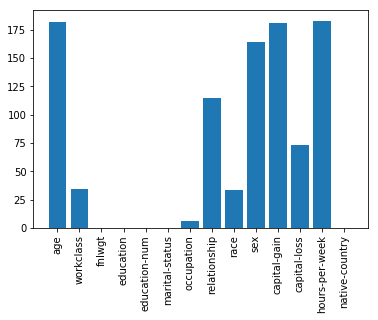

In [561]:
#可视化每个特征对最终结果的影响程度
selector = SelectKBest(f_classif, k = 5)
selector.fit(test_data[predictors], test_data["classification"])

scores = -np.log10(selector.pvalues_)
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation = 'vertical')
plt.show()

In [676]:
#使用决定作用比较大的特征列
new_predictors  =['age','workclass','occupation','relationship','race','sex',
                                'capital-gain','capital-loss',
                                'hours-per-week']

In [677]:
# 去除决定作用比较小的特征列，保留定作用比较大的特征列
test = test_data.drop(columns=['classification','fnlwgt','education','education-num',
                                'marital-status','native-country'])
print(test.shape)

(16281, 9)


In [693]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
alg = DecisionTreeClassifier(max_depth=9)
alg.fit(train_data[new_predictors], train_data["classification"])
prd_test = alg.predict(test)

In [694]:
sum = 0
for i in range(0,len(prd_test)):
    if int(prd_test[i]) == true_test[i]:
        sum += 1
print(1.0 * sum / len(prd_test))

0.8497021067501996


In [688]:
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
alg = KNeighborsClassifier(n_neighbors=11)
alg.fit(train_data[new_predictors], train_data["classification"])
prd_test = alg.predict(test)

In [681]:
sum = 0
for i in range(0,len(prd_test)):
    if int(prd_test[i]) == true_test[i]:
        sum += 1
print(1.0 * sum / len(prd_test))

0.837847798046803


In [682]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
alg = LogisticRegression(random_state = 1)
alg.fit(train_data[new_predictors], train_data["classification"])
prd_test = alg.predict(test)

In [683]:
sum = 0
for i in range(0,len(prd_test)):
    if int(prd_test[i]) == true_test[i]:
        sum += 1
print(1.0 * sum / len(prd_test))

0.8032676125545114


In [671]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
clf1 = DecisionTreeClassifier(max_depth=9) # 微调模型参数
clf2 = KNeighborsClassifier(n_neighbors=11)
clf3 = LogisticRegression(random_state = 1)

#模型融合：weight：dt:knn:log = 7: 5：1
alg = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('log', clf3)], voting='soft',weights=[7,5,1])
alg.fit(train_data[new_predictors], train_data["classification"])
prd_test = alg.predict(test)

/home/mzl/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [672]:
sum = 0
for i in range(0,len(prd_test)):
    if int(prd_test[i]) == true_test[i]:
        sum += 1
print(1.0 * sum / len(prd_test))

0.858731036177139
